In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
covid_data = pd.read_csv('us-counties-covid19-20200523.csv')

In [3]:
USA_pop_county = pd.read_csv('USA_state_county_population_data_2010-2019.csv',encoding = "ISO-8859-1")

In [4]:
USA_pop_county = USA_pop_county[['STNAME', 'CTYNAME', 'POPESTIMATE2019']]
USA_pop_county.columns = ['State', 'County', '2019EstPop']
USA_pop_county['State_County'] = USA_pop_county['State'] + "_" + USA_pop_county['County']
USA_pop_county.head()

,State,County,2019EstPop,State_County
0,Alabama,Alabama,4903185,Alabama_Alabama
1,Alabama,Autauga County,55869,Alabama_Autauga County
2,Alabama,Baldwin County,223234,Alabama_Baldwin County
3,Alabama,Barbour County,24686,Alabama_Barbour County
4,Alabama,Bibb County,22394,Alabama_Bibb County


In [5]:
covid_data['county'] = covid_data['county'] + ' County'
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [6]:
covid_data.sort_values(by=['state', 'county'], inplace = True)

In [7]:
covid_data.head()

,date,county,state,fips,cases,deaths,State_County
9480,2020-03-24,Autauga County,Alabama,1001.0,1,0,Alabama_Autauga County
10832,2020-03-25,Autauga County,Alabama,1001.0,4,0,Alabama_Autauga County
12361,2020-03-26,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County
14021,2020-03-27,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County
15801,2020-03-28,Autauga County,Alabama,1001.0,6,0,Alabama_Autauga County


In [8]:
covid_data.reset_index(drop=True, inplace = True)

In [9]:
# manually change 'Allen County' in Louisiana to 'Allen Parish' BECAUSE there are also 'Allen County' in other states
covid_data.iloc[list(covid_data[covid_data['county'] == 'Allen County'][covid_data['state'] == 'Louisiana'].index),1] = 'Allen Parish'

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
# manually change 'Orleans County' in Louisiana to 'Orleans Parish' BECAUSE there are also 'Orleans County' in other states; similar for other counties
covid_data.iloc[list(covid_data[covid_data['county'] == 'Orleans County'][covid_data['state'] == 'Louisiana'].index),1] = 'Orleans Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Jefferson County'][covid_data['state'] == 'Louisiana'].index),1] = 'Jefferson Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Lafayette County'][covid_data['state'] == 'Louisiana'].index),1] = 'Lafayette Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Caddo County'][covid_data['state'] == 'Louisiana'].index),1] = 'Caddo Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'St. Charles County'][covid_data['state'] == 'Louisiana'].index),1] = 'St. Charles Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Ouachita County'][covid_data['state'] == 'Louisiana'].index),1] = 'Ouachita Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'District of Columbia County'][covid_data['state'] == 'District of Columbia'].index),1] = 'District of Columbia'
covid_data.iloc[list(covid_data[covid_data['county'] == 'New York City County'].index),1] = 'New York City'

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: 

In [11]:
# note the left join when merging COVID-19 dataset with US population dataset
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [13]:
covid_data.drop(columns = ['State', 'County', 'fips'], inplace = True)

#### List of County Names to be Re-Named (to be properly joined with USA population file)

In [14]:
county_list1 = ['Acadia County', 
                'Alexandria city County', 
                'Anchorage County', 
                'Ascension County', 
                'Assumption County',
                'Avoyelles County', 
                'Fairbanks North Star Borough County', 
                'Juneau City and Borough County',
                'St. Tammany County', 
                'East Baton Rouge County', 
                'Baltimore city County', 
                'St. Louis city County',
                'St. John the Baptist County',
                'District of Columbia County',
                'Kansas City County',
                'St. Bernard County',
                'Lafourche County',
                'Virginia Beach city County',
                'St. James County',
                'Bossier County']
county_list2 = ['Acadia Parish',
                'Alexandria city',
                'Anchorage Municipality',
                'Ascension Parish',
                'Assumption Parish',
                'Avoyelles Parish',
                'Fairbanks North Star Borough',
                'Juneau City and Borough',
                'St. Tammany Parish',
                'East Baton Rouge Parish',
                'Baltimore city',
                'St. Louis city',
                'St. John the Baptist Parish',
                'District of Columbia',
                'Kansas City',
                'St. Bernard Parish',
                'Lafourche Parish',
                'Virginia Beach city', 
                'St. James Parish',
                'Bossier Parish']

In [15]:
covid_data.replace(to_replace = county_list1, value = county_list2, inplace = True)

In [16]:
covid_data.drop(columns = 'State_County', inplace = True)

In [17]:
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [18]:
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [19]:
covid_data.drop(columns = ['State', 'County', '2019EstPop_x'], inplace = True)

In [20]:
covid_data.rename(columns={'2019EstPop_y':'2019EstPop'}, inplace = True)

In [21]:
covid_data.head()

,date,county,state,cases,deaths,State_County,2019EstPop
0,2020-03-24,Autauga County,Alabama,1,0,Alabama_Autauga County,55869.0
1,2020-03-25,Autauga County,Alabama,4,0,Alabama_Autauga County,55869.0
2,2020-03-26,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0
3,2020-03-27,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0
4,2020-03-28,Autauga County,Alabama,6,0,Alabama_Autauga County,55869.0


In [22]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [23]:
covid_data.dtypes

date            datetime64[ns]
county                  object
state                   object
cases                    int64
deaths                   int64
State_County            object
2019EstPop             float64
dtype: object

In [24]:
covid_data_US = covid_data.groupby('date')['cases', 'deaths'].sum()
covid_data_US = covid_data_US[covid_data_US.index > '2020-03-02']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [25]:
covid_data['CasesPer100000'] = covid_data['cases'] / (covid_data['2019EstPop'] / 100000)
covid_data['DeathsPer100000'] = covid_data['deaths'] / (covid_data['2019EstPop'] / 100000)

In [26]:
states = ['Illinois', 'Michigan', 'New York', 'Washington', 'California', 'Louisiana', 'Florida']
date_recent = '2020-03-10'

In [27]:
covid_st = covid_data[covid_data.state.isin(states)]

In [28]:
states = list(set(covid_data['state']))
states.sort()

In [29]:
covid_st.loc[:,'date'] = pd.to_datetime(covid_st.loc[:,'date'])

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
covid_st = covid_st[covid_st['date'] > date_recent]

In [31]:
covid_st_IL = covid_st[covid_st['state'] == 'Illinois']
covid_st_MI = covid_st[covid_st['state'] == 'Michigan']

In [32]:
covid_st_IL_summ = covid_st_IL.groupby('date')['cases','deaths'].sum()
covid_st_MI_summ = covid_st_MI.groupby('date')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [33]:
covid_st_IL_summ.tail()

,cases,deaths
date,,
2020-05-19,98298,4399
2020-05-20,100713,4547
2020-05-21,102995,4634
2020-05-22,105710,4740
2020-05-23,108100,4817


In [34]:
110304 - 108100

2204

In [35]:
covid_IL_daily = covid_st_IL_summ.diff()
covid_IL_daily.columns = ['newcases_daily', 'newdeaths_daily']

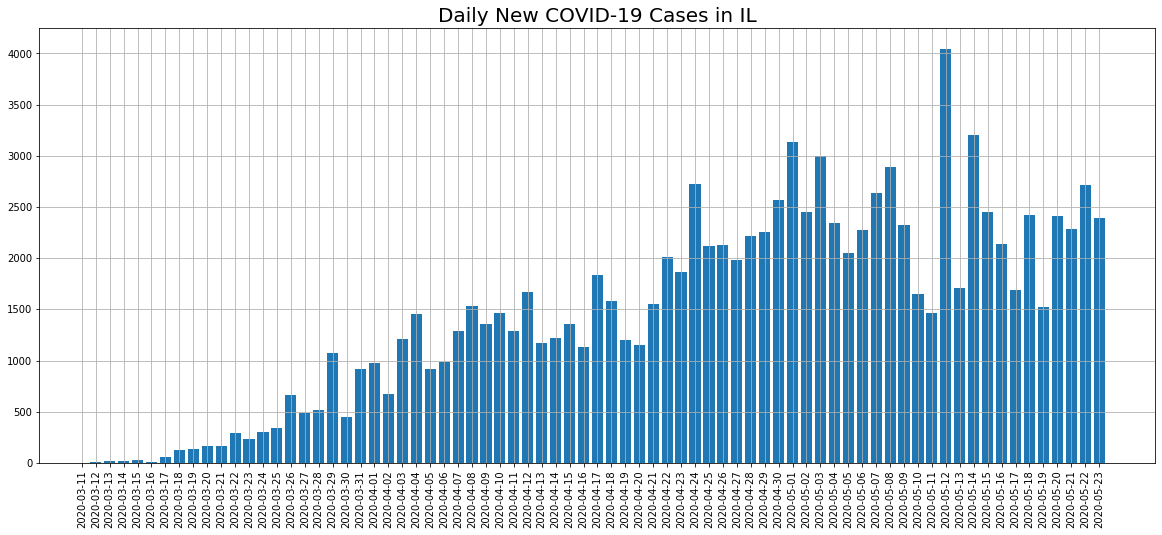

In [36]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in IL', fontsize = '20')
plt.bar(covid_IL_daily.index, covid_IL_daily.newcases_daily)

# y_ticks = np.linspace(0,3200,9)
plt.xticks(covid_IL_daily.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [37]:
covid_st_IL_summ_pct = covid_st_IL_summ.pct_change()
covid_st_IL_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

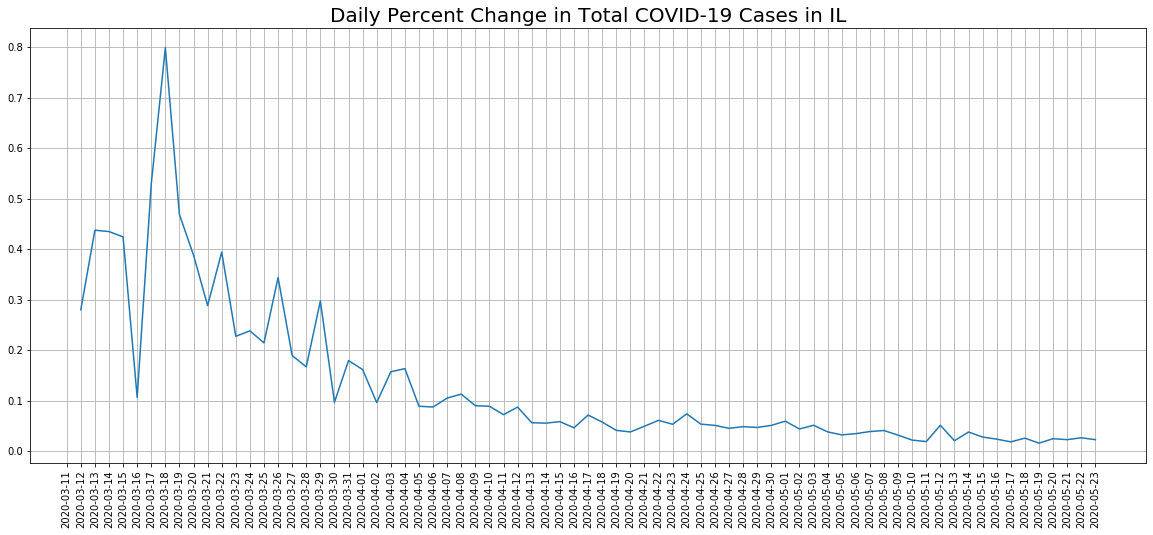

In [38]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in IL', fontsize = '20')
plt.plot(covid_st_IL_summ_pct.index, covid_st_IL_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_st_IL_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [39]:
# Cook County passed 100+ cases on 2020-03-17, look at data past that date
covid_data_IL_Cook = covid_data[covid_data['State_County'] == 
           'Illinois_Cook County'][covid_data['date'] > '2020-03-16'][['date', 'cases', 'deaths']]
covid_data_IL_Cook.set_index('date', inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
covid_data_IL_Cook.tail()

,cases,deaths
date,,
2020-05-19,64691,2980
2020-05-20,66213,3074
2020-05-21,67551,3114
2020-05-22,68949,3187
2020-05-23,70417,3246


In [41]:
42372 + 29638    

72010

In [42]:
72010 - 70417

1593

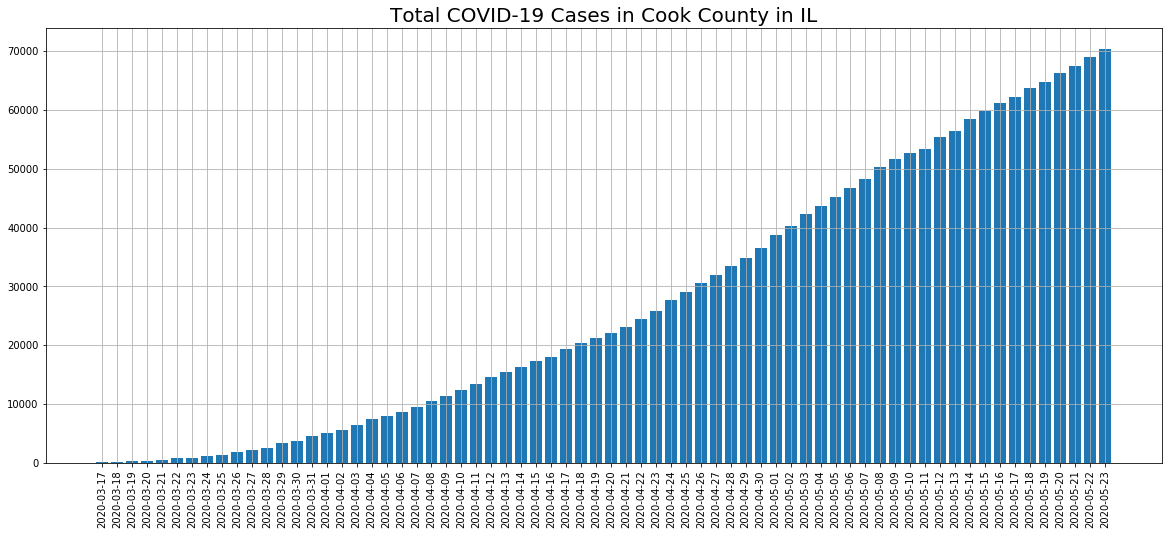

In [43]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.cases)

# y_ticks = np.linspace(0,45000,10)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
# plt.yticks(y_ticks)

plt.savefig('Total_COVID19_Cases_CookCounty_IL');

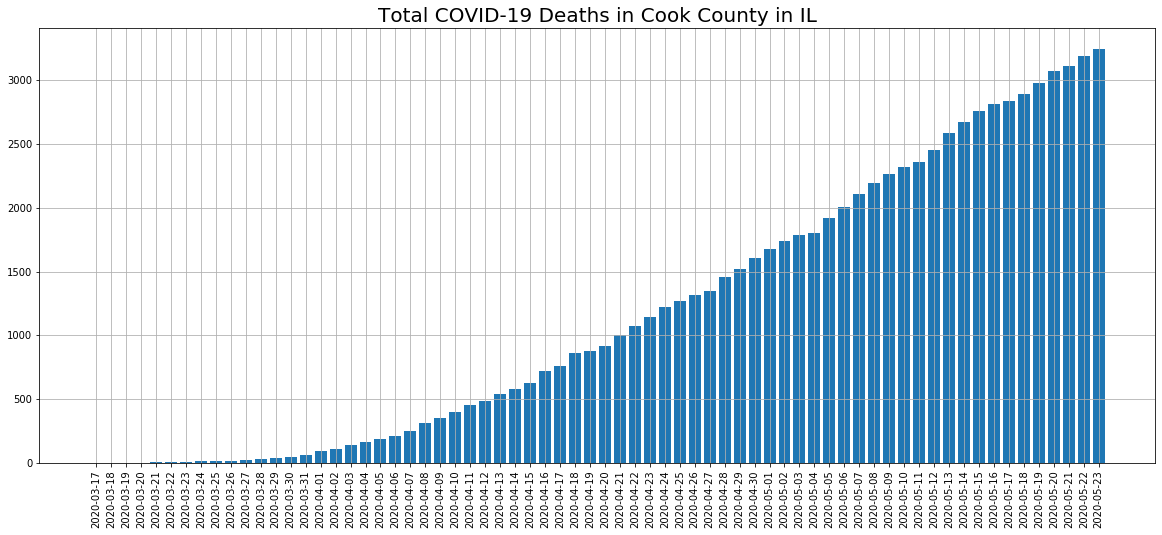

In [44]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook.index, covid_data_IL_Cook.deaths)

# y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

# plt.savefig('Total_COVID19_Deaths_CookCounty_IL');

In [45]:
covid_data_IL_Cook_daily = covid_data_IL_Cook.diff()
covid_data_IL_Cook_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [46]:
covid_data_IL_Cook_daily.reset_index(inplace=True)

In [47]:
covid_data_IL_Cook_daily.tail()

,date,newcases_daily,newdeaths_daily
63,2020-05-19,1001.0,91.0
64,2020-05-20,1522.0,94.0
65,2020-05-21,1338.0,40.0
66,2020-05-22,1398.0,73.0
67,2020-05-23,1468.0,59.0


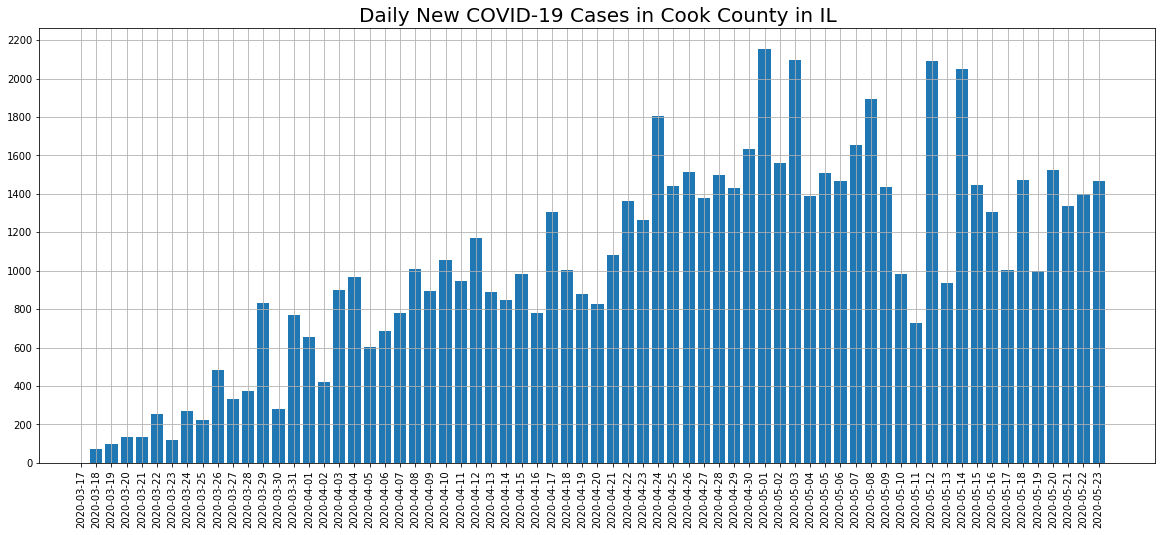

In [48]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily.newcases_daily)

y_ticks = np.linspace(0,2200,12)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

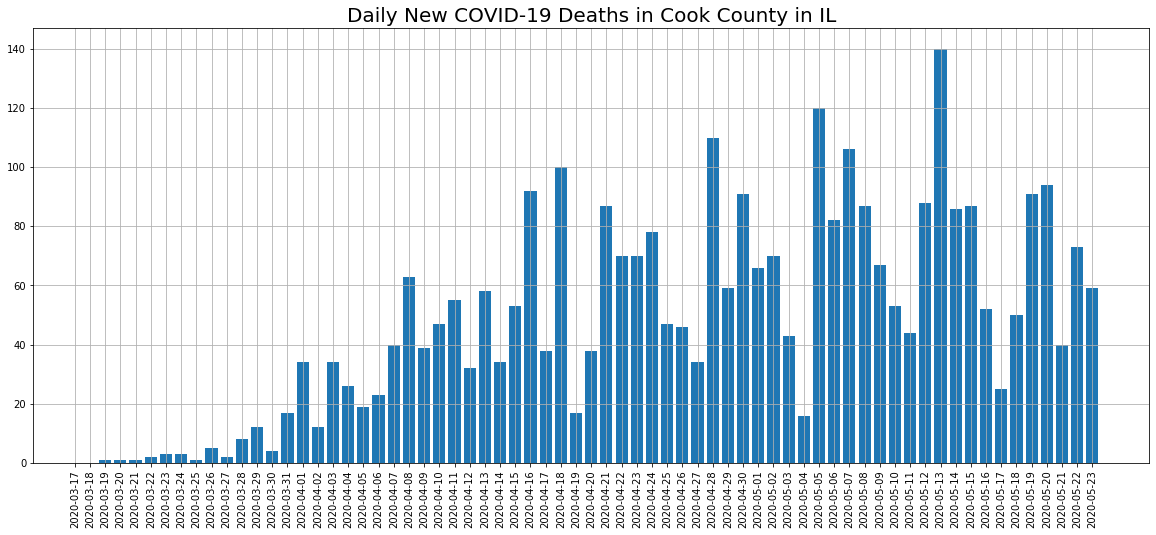

In [49]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Cook County in IL', fontsize = '20')
plt.bar(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily.newdeaths_daily)

# y_ticks = np.linspace(0,100,11)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [133]:
#  covid_data_IL_Cook_daily['3davg_dailynewcases'] = np.nan
#  covid_data_IL_Cook_daily['7davg_dailynewcases'] = np.nan

In [134]:
#  covid_data_IL_Cook_daily.drop(columns=['3davg_dailynewcases','7davg_dailynewcases'],inplace=True)

In [135]:
covid_data_IL_Cook_daily.head()

,date,newcases_daily,newdeaths_daily
0,2020-03-17,NaN,NaN
1,2020-03-18,72.0,0.0
2,2020-03-19,100.0,1.0
3,2020-03-20,133.0,1.0
4,2020-03-21,136.0,1.0


In [136]:
# num_avg is the number of days for average_dailynewcases
num_avg = 7

In [137]:
covid_data_IL_Cook_daily[str(num_avg) + 'davg_dailynewcases'] = np.nan

In [138]:
# for loop to create/populate new column '#davg_dailynewcases'
for i in range(0,len(covid_data_IL_Cook_daily)):
    if i <= (num_avg - 1):
        covid_data_IL_Cook_daily.iloc[i,3] = np.nan
    else:
        list1 = []
        for j in range(num_avg-1, -1, -1):
            list1.append(covid_data_IL_Cook_daily.iloc[i-j,1])
            covid_data_IL_Cook_daily.iloc[i,3] = sum(list1) / num_avg

In [145]:
(1307+1006+1472+1001+1522+1338+1398)/7      # calculating 7-day avg for 2020-05-22, just checking calc/code

1292.0

In [149]:
covid_data_IL_Cook_daily = covid_data_IL_Cook_daily[covid_data_IL_Cook_daily.date > '2020-03-23']

In [150]:
covid_data_IL_Cook_daily.head(10)

,date,newcases_daily,newdeaths_daily,7davg_dailynewcases
7,2020-03-24,272.0,3.0,155.285714
8,2020-03-25,224.0,1.0,177.000000
9,2020-03-26,486.0,5.0,232.142857
10,2020-03-27,335.0,2.0,261.000000
11,2020-03-28,374.0,8.0,295.000000
12,2020-03-29,832.0,12.0,377.142857
13,2020-03-30,282.0,4.0,400.714286
14,2020-03-31,769.0,17.0,471.714286
15,2020-04-01,656.0,34.0,533.428571
16,2020-04-02,423.0,12.0,524.428571


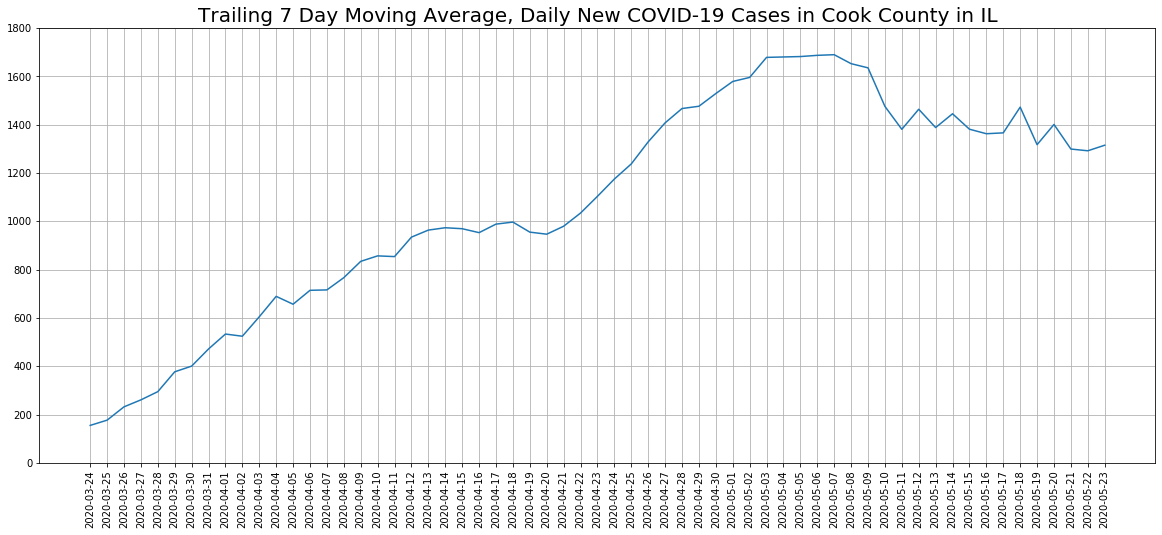

In [152]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Trailing 7 Day Moving Average, Daily New COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_daily.date, covid_data_IL_Cook_daily['7davg_dailynewcases'])

y_ticks = np.linspace(0,1800,10)
plt.xticks(covid_data_IL_Cook_daily.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [55]:
covid_data_IL_Cook_pct = covid_data_IL_Cook.pct_change()
covid_data_IL_Cook_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

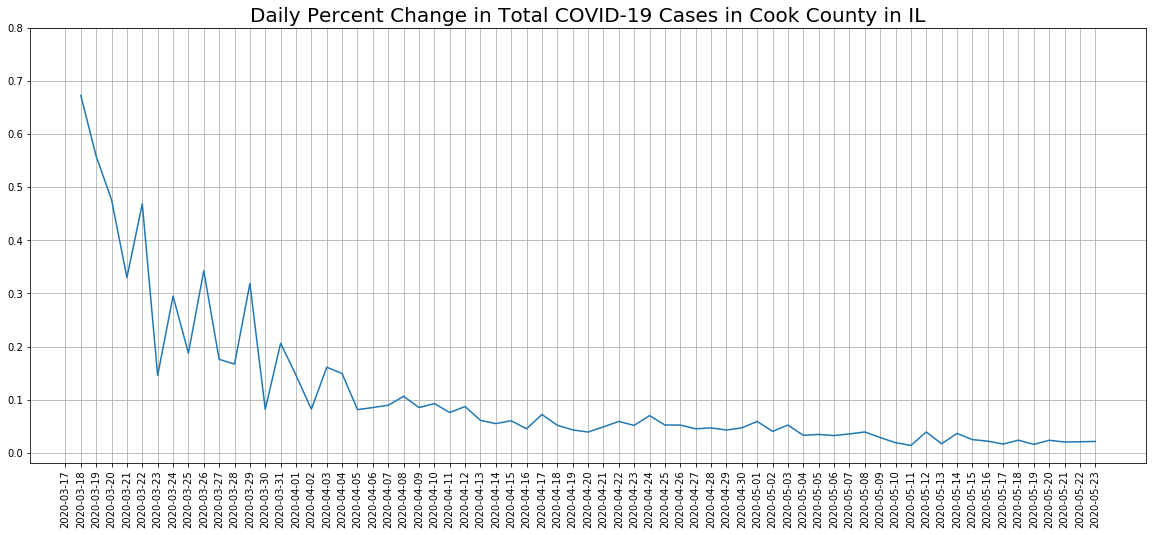

In [56]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook_pct.index, covid_data_IL_Cook_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_data_IL_Cook_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [57]:
covid_MI_OAK = covid_st_MI[covid_st_MI['county'] == 'Oakland County'].groupby('date')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [58]:
covid_MI_OAK.tail()

,cases,deaths
date,,
2020-05-19,8078,928
2020-05-20,8117,935
2020-05-21,8125,945
2020-05-22,8131,944
2020-05-23,8192,954


In [59]:
8215 - 8192       

23

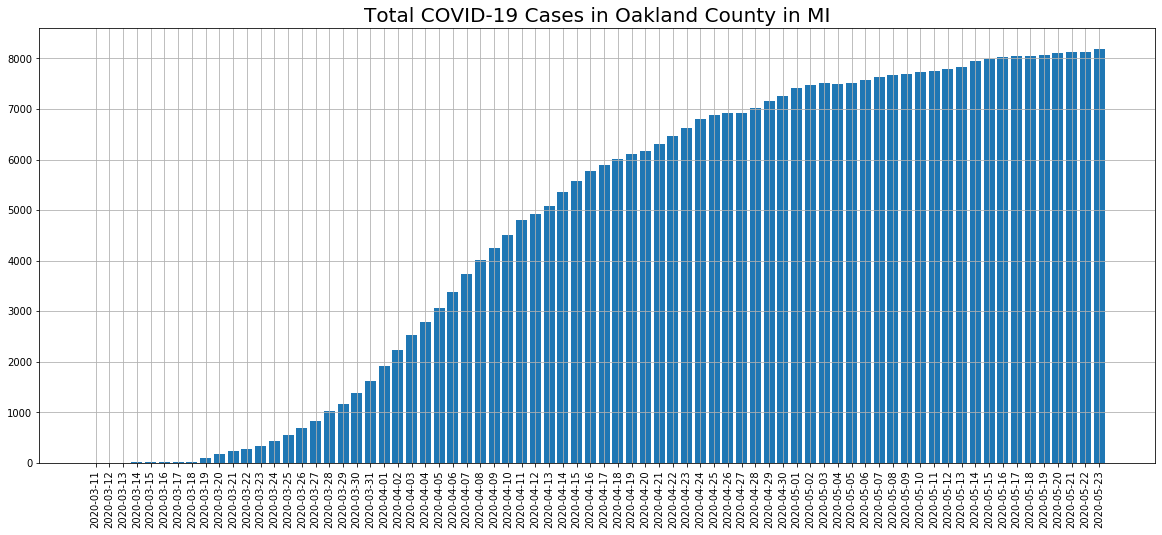

In [60]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.cases)

# y_ticks = np.linspace(0,7500,16)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks)

plt.savefig('Total_COVID19_Cases_OaklandCounty_MI');

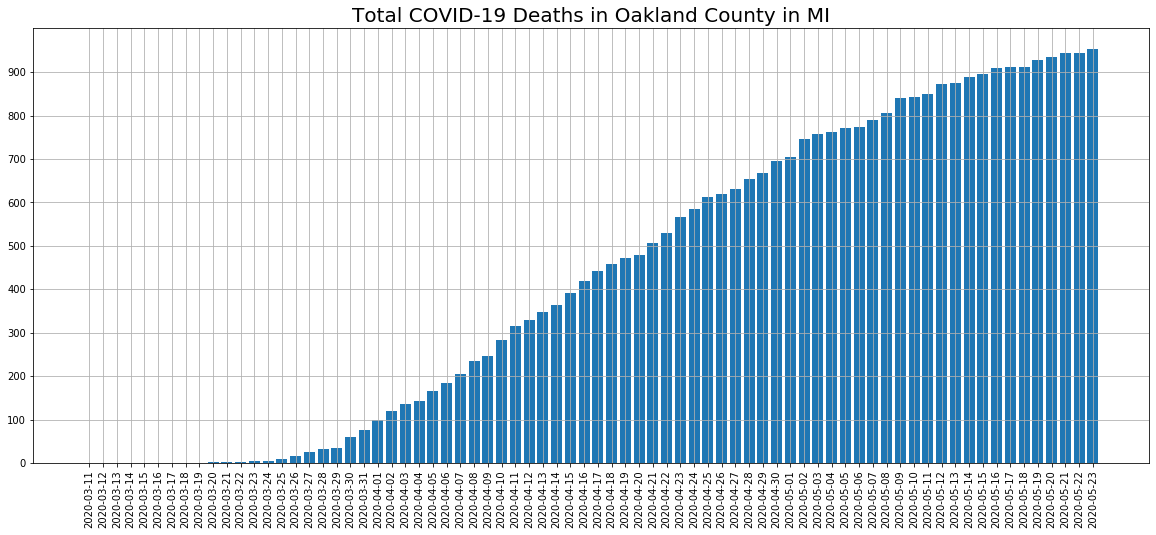

In [61]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK.index, covid_MI_OAK.deaths)

y_ticks = np.linspace(0,900,10)
plt.xticks(covid_MI_OAK.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

# plt.savefig('Total_COVID19_Deaths_OaklandCounty_MI');

In [62]:
covid_MI_OAK_daily = covid_MI_OAK.diff()
covid_MI_OAK_daily.columns = ['newcases_daily', 'newdeaths_daily']

In [63]:
covid_MI_OAK_daily.tail()

,newcases_daily,newdeaths_daily
date,,
2020-05-19,28.0,15.0
2020-05-20,39.0,7.0
2020-05-21,8.0,10.0
2020-05-22,6.0,-1.0
2020-05-23,61.0,10.0


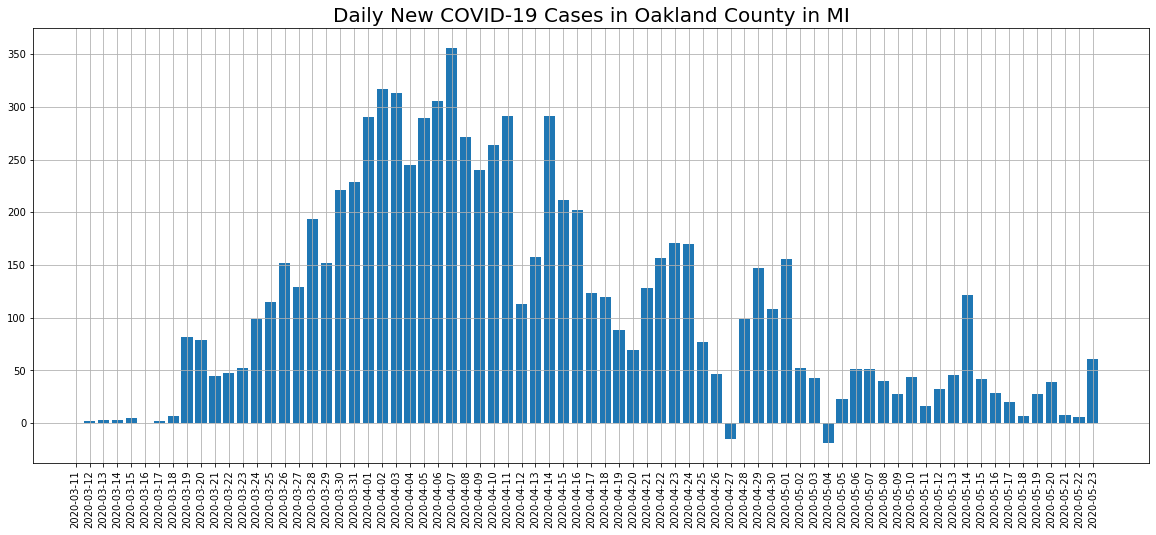

In [64]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newcases_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

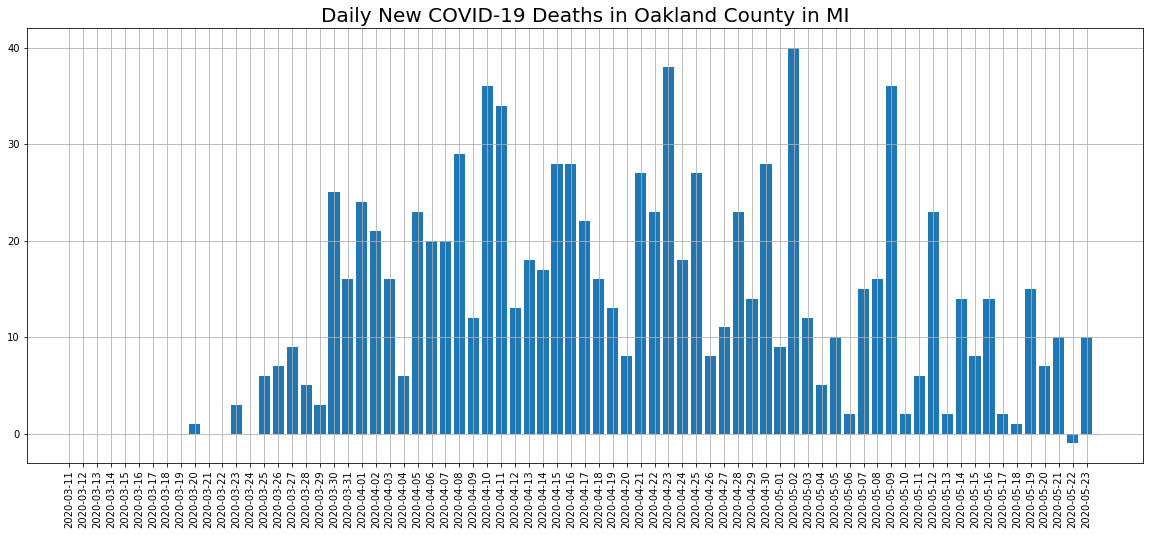

In [65]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Oakland County in MI', fontsize = '20')
plt.bar(covid_MI_OAK_daily.index, covid_MI_OAK_daily.newdeaths_daily)

plt.xticks(covid_MI_OAK_daily.index, fontsize = '10', rotation = 90);

In [66]:
# there was a large spike on 3/19/2020 so look at the daily % change after that date
covid_MI_OAK_pct = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19'].pct_change()
covid_MI_OAK_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

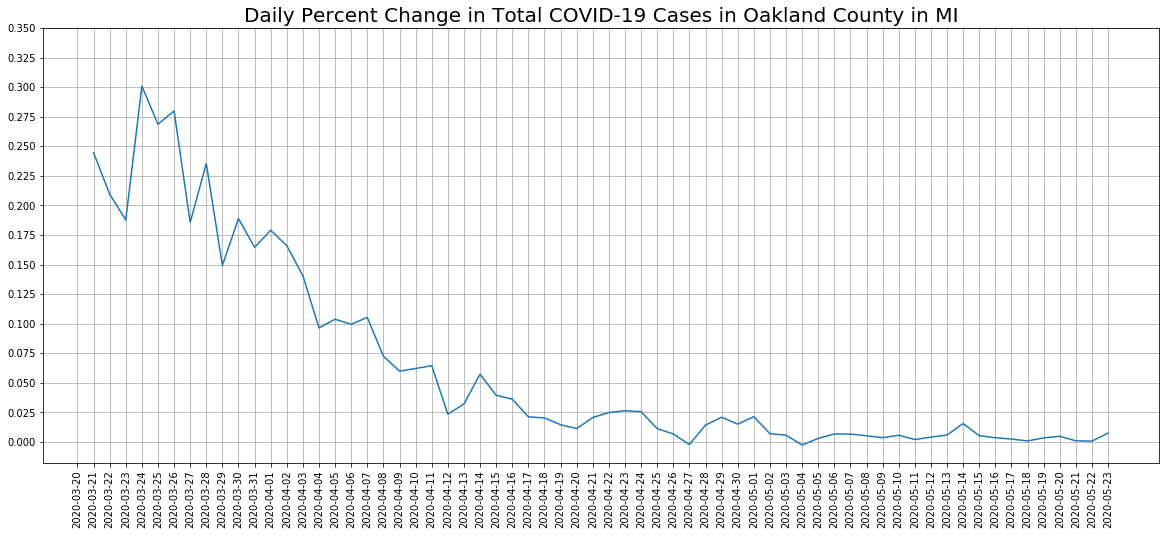

In [69]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_pct.index, covid_MI_OAK_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.35,15)
plt.xticks(covid_MI_OAK_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [70]:
# 10 deaths on 2020-03-25, look at data after that date
covid_MI_OAK_cum = covid_MI_OAK[covid_MI_OAK.index > '2020-03-24']
covid_MI_OAK_cum

,cases,deaths
date,,
2020-03-25,543,10
2020-03-26,695,17
2020-03-27,824,26
2020-03-28,1018,31
2020-03-29,1170,34
2020-03-30,1391,59
2020-03-31,1620,75
2020-04-01,1910,99
2020-04-02,2227,120


In [71]:
cases_day0 = covid_MI_OAK_cum.iloc[0,0]
deaths_day0 = covid_MI_OAK_cum.iloc[0,1]
print(cases_day0)
print(deaths_day0)

543
10


In [72]:
covid_MI_OAK_cum['cum_pctchange_cases'] = covid_MI_OAK_cum['cases'] / cases_day0
covid_MI_OAK_cum['cum_pctchange_deaths'] = covid_MI_OAK_cum['deaths'] / deaths_day0

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
covid_MI_OAK_pct

,cases_dailypctchange,deaths_dailypctchange
date,,
2020-03-20,NaN,NaN
2020-03-21,0.244565,0.000000
2020-03-22,0.209607,0.000000
2020-03-23,0.187726,3.000000
2020-03-24,0.300912,0.000000
...,...,...
2020-05-19,0.003478,0.016429
2020-05-20,0.004828,0.007543
2020-05-21,0.000986,0.010695


In [74]:
covid_MI_OAK_cum['daily_pctchange_cases'] = [covid_MI_OAK_pct.loc[i, 'cases_dailypctchange'] for i in list(covid_MI_OAK_cum.index)]
covid_MI_OAK_cum['daily_pctchange_deaths'] = [covid_MI_OAK_pct.loc[i, 'deaths_dailypctchange'] for i in list(covid_MI_OAK_cum.index)]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
covid_MI_OAK_cum

,cases,deaths,cum_pctchange_cases,cum_pctchange_deaths,daily_pctchange_cases,daily_pctchange_deaths
date,,,,,,
2020-03-25,543,10,1.000000,1.0,0.268692,1.500000
2020-03-26,695,17,1.279926,1.7,0.279926,0.700000
2020-03-27,824,26,1.517495,2.6,0.185612,0.529412
2020-03-28,1018,31,1.874770,3.1,0.235437,0.192308
2020-03-29,1170,34,2.154696,3.4,0.149312,0.096774
2020-03-30,1391,59,2.561694,5.9,0.188889,0.735294
2020-03-31,1620,75,2.983425,7.5,0.164630,0.271186
2020-04-01,1910,99,3.517495,9.9,0.179012,0.320000
2020-04-02,2227,120,4.101289,12.0,0.165969,0.212121


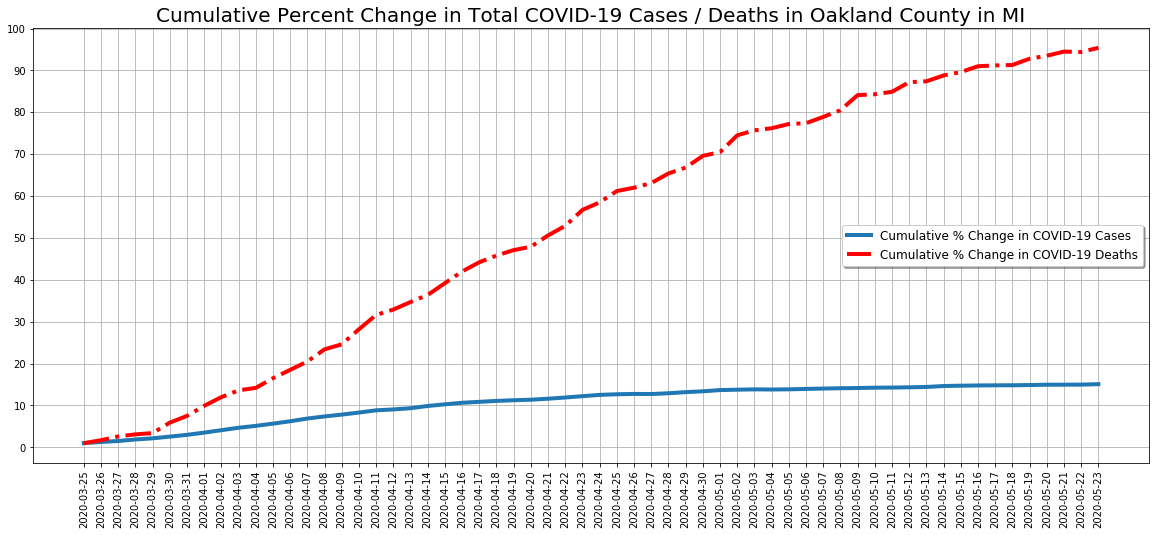

In [76]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Cumulative Percent Change in Total COVID-19 Cases / Deaths in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_cum.index, covid_MI_OAK_cum.cum_pctchange_cases, linewidth = 4, linestyle = '-')
plt.plot(covid_MI_OAK_cum.index, covid_MI_OAK_cum.cum_pctchange_deaths, linewidth = 4, color = 'r', linestyle = '-.')

ticks_y = np.linspace(0,100,11)
plt.xticks(covid_MI_OAK_cum.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10')
plt.legend(['Cumulative % Change in COVID-19 Cases','Cumulative % Change in COVID-19 Deaths'], 
           shadow = True, loc = 5, fontsize = '12');

In [77]:
covid_MI_OAK['death_rate'] = covid_MI_OAK['deaths'] / covid_MI_OAK['cases']

In [78]:
covid_MI_OAK_deathrate = covid_MI_OAK[covid_MI_OAK.index > '2020-03-19']
covid_MI_OAK_deathrate.tail()

,cases,deaths,death_rate
date,,,
2020-05-19,8078,928,0.114880
2020-05-20,8117,935,0.115190
2020-05-21,8125,945,0.116308
2020-05-22,8131,944,0.116099
2020-05-23,8192,954,0.116455


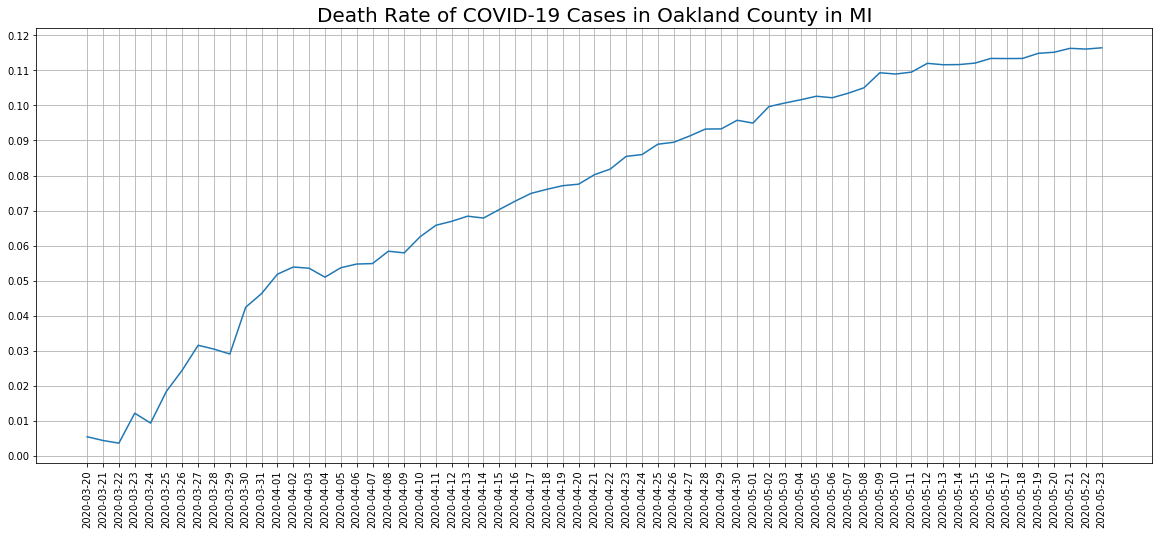

In [79]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Oakland County in MI', fontsize = '20')
plt.plot(covid_MI_OAK_deathrate.index, covid_MI_OAK_deathrate.death_rate)

ticks_y = np.linspace(0,0.12,13)
plt.xticks(covid_MI_OAK_deathrate.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [80]:
covid_MI_Wayne = covid_st_MI[covid_st_MI['county'] == 'Wayne County'][['date', 'cases', 'deaths']]
covid_MI_Wayne.set_index('date', inplace=True)

In [81]:
covid_MI_Wayne.tail()

,cases,deaths
date,,
2020-05-19,19292,2275
2020-05-20,19432,2284
2020-05-21,19538,2313
2020-05-22,19602,2323
2020-05-23,19697,2361


In [85]:
10699 + 9072    

19771

In [86]:
19771 - 19697

74

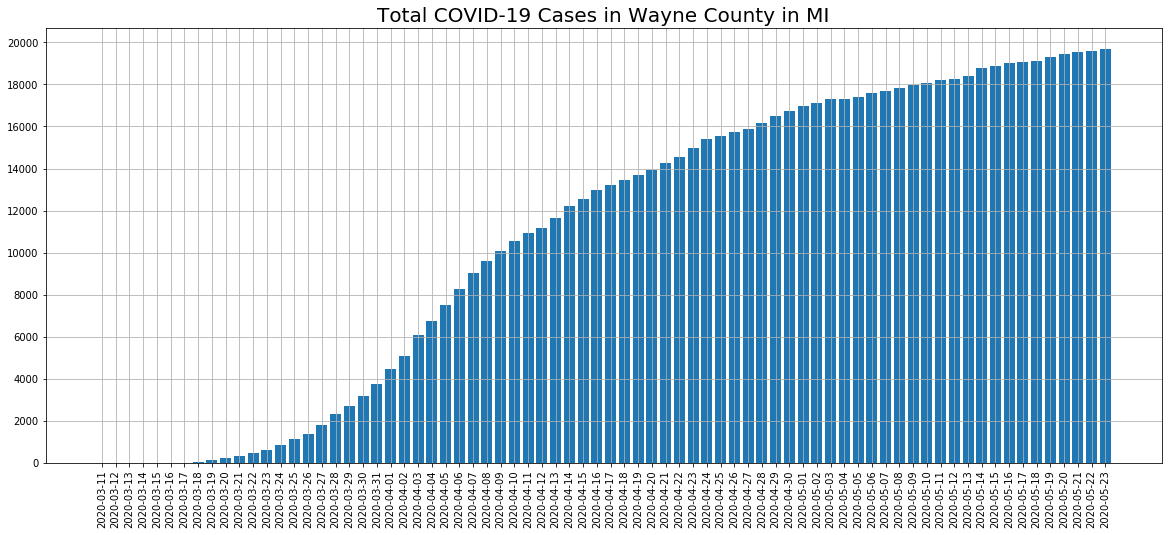

In [87]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.cases)

y_ticks = np.linspace(0,20000,11)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks, fontsize = '10')

plt.savefig('Total_COVID19_Cases_WayneCounty_MI');
# plt.yticks(y_ticks);

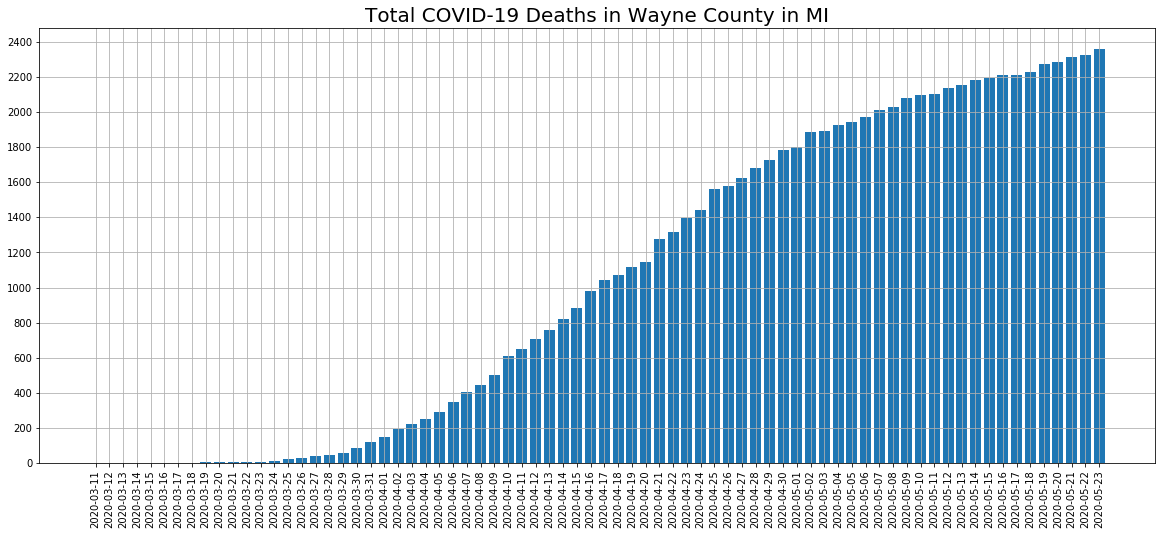

In [88]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne.index, covid_MI_Wayne.deaths)

y_ticks = np.linspace(0,2400,13)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

# plt.savefig('Total_COVID19_Cases_WayneCounty_MI');

In [89]:
covid_MI_Wayne_daily = covid_MI_Wayne.diff()
covid_MI_Wayne_daily.columns = ['newcases_daily', 'newdeaths_daily']

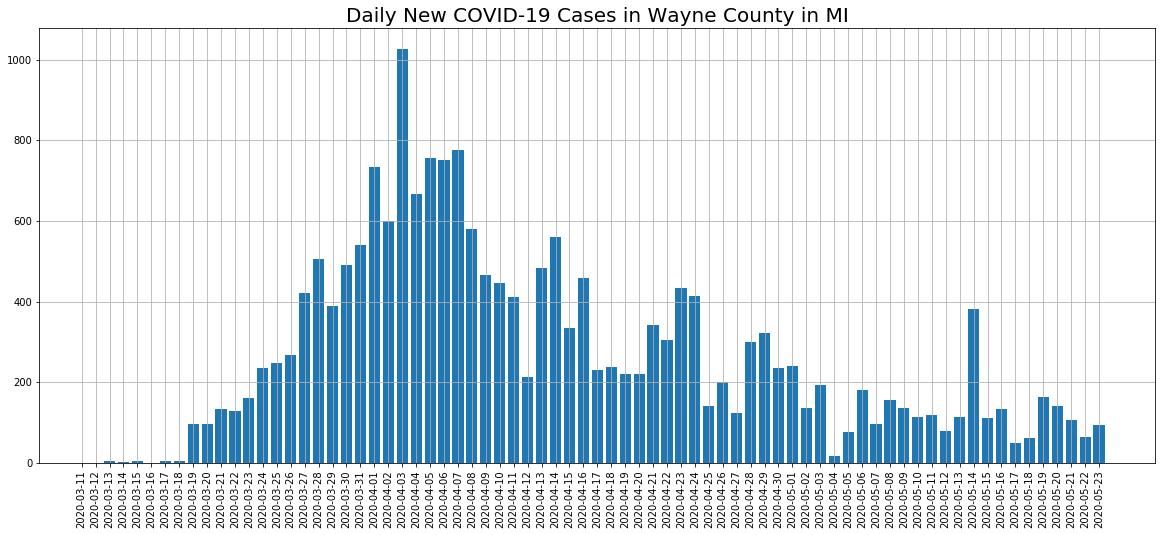

In [90]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newcases_daily)

plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90);

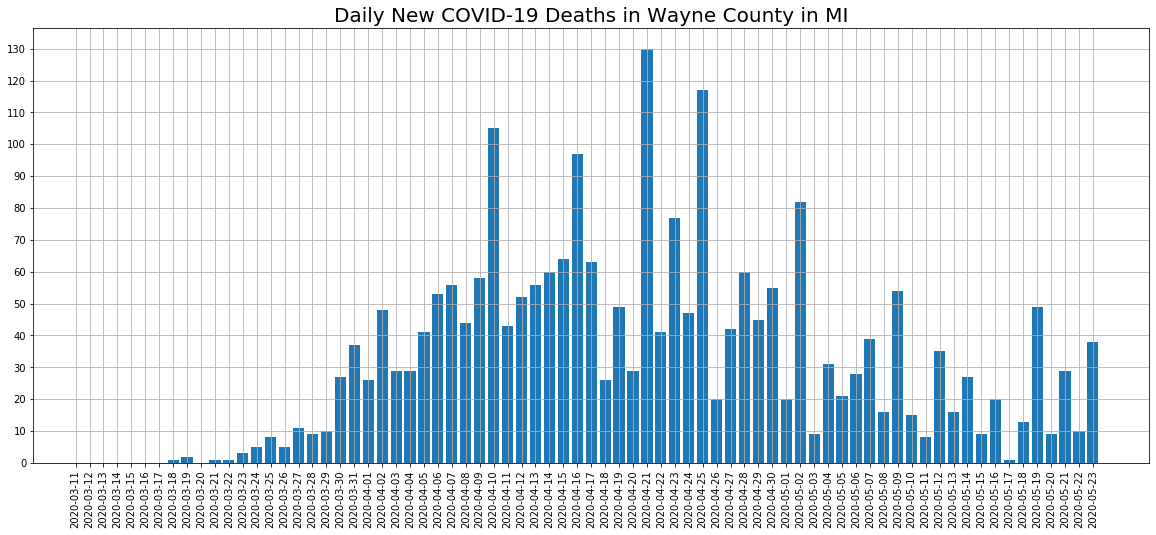

In [91]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Deaths in Wayne County in MI', fontsize = '20')
plt.bar(covid_MI_Wayne_daily.index, covid_MI_Wayne_daily.newdeaths_daily)

y_ticks = np.linspace(0,130,14)
plt.xticks(covid_MI_Wayne_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [92]:
# large spike on 2020-03-19 so look at data after that date
covid_MI_Wayne_pct = covid_MI_Wayne[covid_MI_Wayne.index > '2020-03-19'].pct_change()
covid_MI_Wayne_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

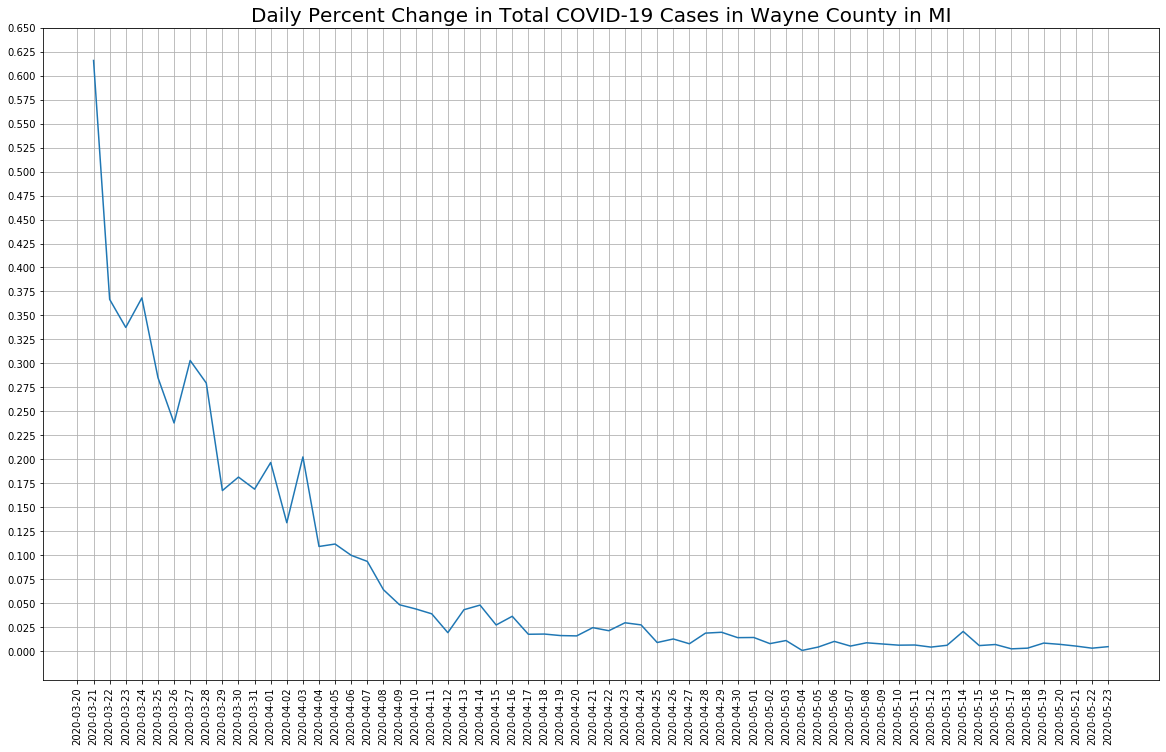

In [93]:
plt.figure(figsize=[20,12])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne_pct.index, covid_MI_Wayne_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.65,27)
plt.xticks(covid_MI_Wayne_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [94]:
covid_MI_Wayne['death_rate'] = covid_MI_Wayne['deaths'] / covid_MI_Wayne['cases']

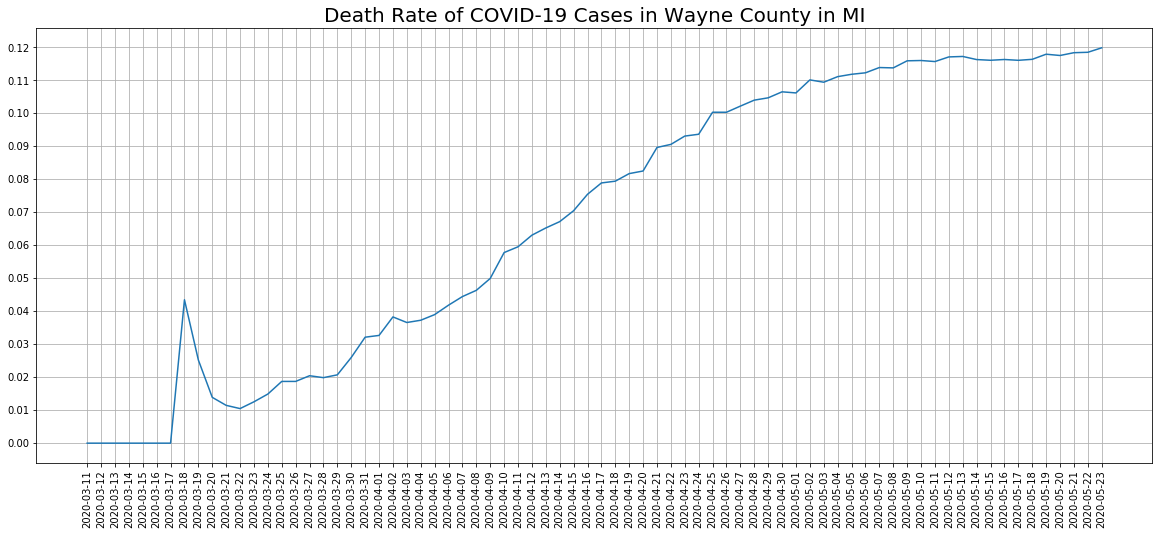

In [95]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Wayne County in MI', fontsize = '20')
plt.plot(covid_MI_Wayne.index, covid_MI_Wayne.death_rate)

ticks_y = np.linspace(0,0.12,13)
plt.xticks(covid_MI_Wayne.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

In [96]:
covid_st_MI_daily = covid_st_MI_summ.diff()
covid_st_MI_daily.columns = ['newcases_daily', 'newdeaths_daily']

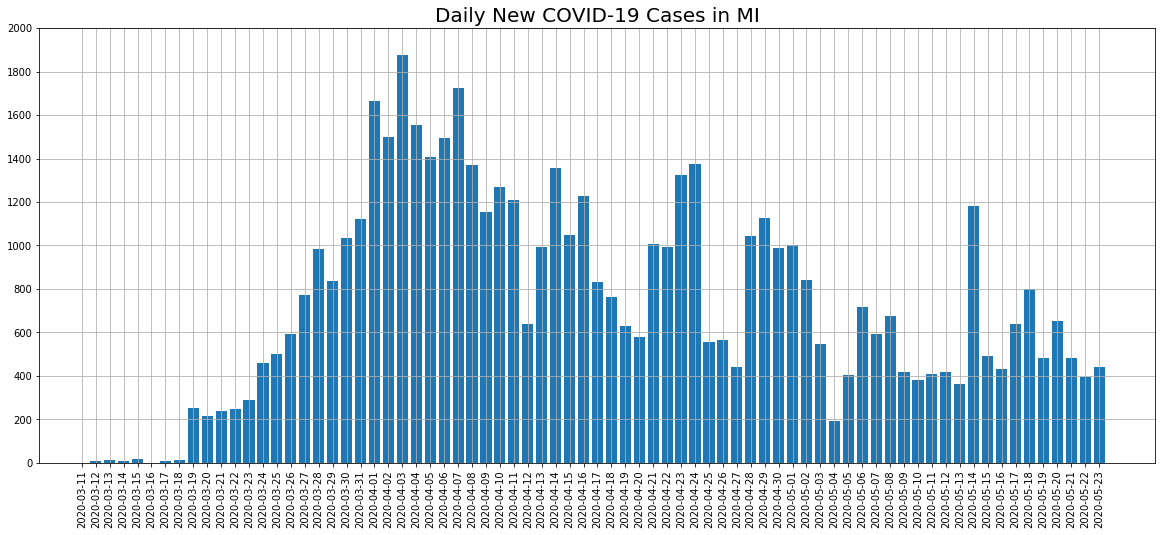

In [98]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in MI', fontsize = '20')
plt.bar(covid_st_MI_daily.index, covid_st_MI_daily.newcases_daily)

y_ticks = np.linspace(0,2000,11)
plt.xticks(covid_st_MI_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [99]:
# changed the date range for MI because there was a >300% increase in total # cases on 3/19/2019 (skews y-axis)
covid_st_MI_summ_pct = covid_st_MI_summ[covid_st_MI_summ.index > '2020-03-19'].pct_change()
covid_st_MI_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

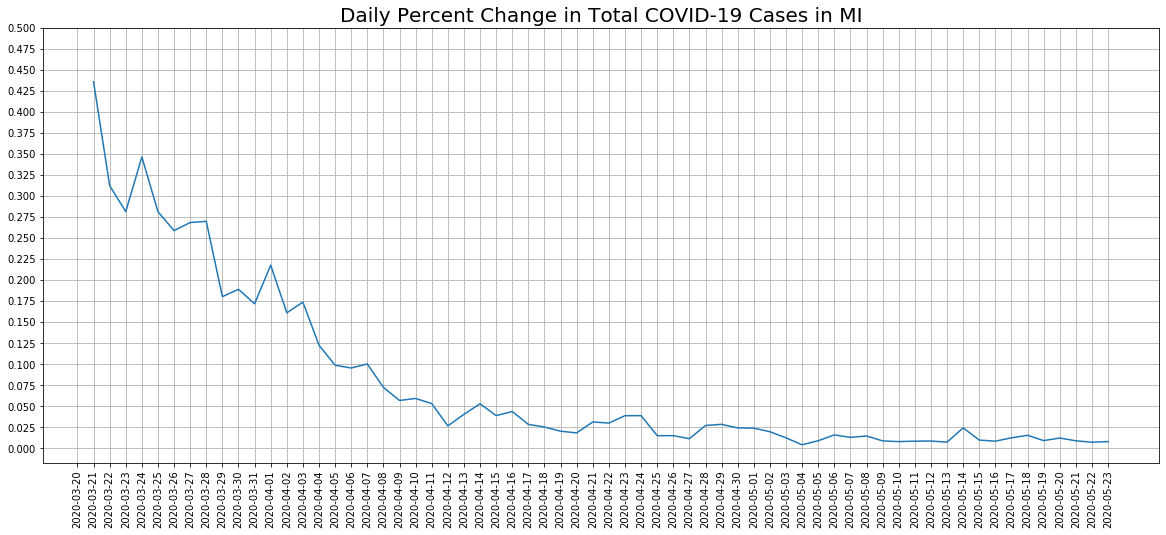

In [100]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in MI', fontsize = '20')
plt.plot(covid_st_MI_summ_pct.index, covid_st_MI_summ_pct.cases_dailypctchange)

ticks_y = np.linspace(0,0.50,21)
plt.xticks(covid_st_MI_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(ticks_y, fontsize = '10');

## COVID-19 Data (Latest Data)

In [101]:
covid_data_latest = covid_data[covid_data['date'] == covid_data.date.max()]

In [102]:
covid_data_latest_sum = covid_data_latest.groupby('state')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [103]:
covid_data_latest_sum = covid_data_latest_sum.sort_values(by='cases', ascending=False)

In [104]:
covid_data_latest_sum['death_rate'] = covid_data_latest_sum['deaths'] / covid_data_latest_sum['cases']

In [105]:
covid_data_latest.loc[:,'CasesPer100000_dup'] = covid_data_latest['CasesPer100000']
covid_data_latest.loc[:,'DeathsPer100000_dup'] = covid_data_latest['DeathsPer100000']
covid_data_latest.loc[:,'2019EstPop_dup'] = covid_data_latest['2019EstPop']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [106]:
covid_data_latest.loc[:, 'CasesPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, 'DeathsPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, '2019EstPop_dup'] = covid_data_latest.rank(pct=True)

In [107]:
covid_data_latest.rename(columns={'CasesPer100000_dup':'Pctile_CasesPer100000', 'DeathsPer100000_dup':'Pctile_DeathsPer100000', '2019EstPop_dup':'Pctile_2019EstPop'}, inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
covid_data_latest['Diff_Pct2019Pop_VS_PctCases'] = covid_data_latest['Pctile_2019EstPop'] - covid_data_latest['Pctile_CasesPer100000']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
covid_data_latest['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
covid_data_latest = covid_data_latest[['date', 'county', 'state', 'cases', 'deaths', 'death_rate', 'State_County', '2019EstPop',
'CasesPer100000', 'DeathsPer100000', 'Pctile_CasesPer100000', 'Pctile_DeathsPer100000', 'Pctile_2019EstPop', 
'Diff_Pct2019Pop_VS_PctCases']]

In [111]:
covid_data_latest.describe()

,cases,deaths,death_rate,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
count,2964.000000,2964.000000,2964.000000,2.842000e+03,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2.842000e+03
mean,550.267881,32.745951,inf,1.139150e+05,285.408084,11.545197,0.500176,0.500176,0.500176,-9.649018e-17
std,4448.936361,404.630865,NaN,3.749648e+05,566.051990,25.337329,0.288726,0.277216,0.288726,3.504097e-01
min,0.000000,0.000000,0.000000,6.250000e+02,3.841426,0.000000,0.000352,0.213934,0.000352,-9.634061e-01
25%,10.000000,0.000000,0.000000,1.324150e+04,55.583569,0.000000,0.250264,0.213934,0.250264,-2.292400e-01
50%,39.000000,1.000000,0.016393,2.895500e+04,121.870497,2.304428,0.500176,0.500176,0.500176,1.653765e-02
75%,181.000000,6.000000,0.053579,7.590900e+04,298.851291,10.569722,0.750088,0.750088,0.750088,2.543103e-01
max,202062.000000,20621.000000,inf,1.003911e+07,12300.602623,304.770836,1.000000,1.000000,1.000000,8.888107e-01


In [112]:
covid_data_latest[covid_data_latest['state'] == 'Illinois'].sort_values(by='cases', ascending=False)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
36191,2020-05-23,Cook County,Illinois,70417,3246,0.046097,Illinois_Cook County,5150233.0,1367.258530,63.026275,0.969740,0.957072,0.999296,0.029557
37987,2020-05-23,Lake County,Illinois,7465,250,0.033490,Illinois_Lake County,696535.0,1071.733653,35.891951,0.952850,0.910274,0.967628,0.014778
36563,2020-05-23,DuPage County,Illinois,6891,339,0.049195,Illinois_DuPage County,922921.0,746.651122,36.731205,0.922590,0.913793,0.980999,0.058410
37656,2020-05-23,Kane County,Illinois,5575,152,0.027265,Illinois_Kane County,532403.0,1047.139103,28.549802,0.950739,0.882477,0.955313,0.004574
40582,2020-05-23,Will County,Illinois,5012,257,0.051277,Illinois_Will County,690743.0,725.595482,37.206313,0.919071,0.916960,0.966925,0.047854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39382,2020-05-23,Pike County,Illinois,1,0,0.000000,Illinois_Pike County,15561.0,6.426322,0.000000,0.005982,0.213934,0.298733,0.292752
37108,2020-05-23,Hardin County,Illinois,1,0,0.000000,Illinois_Hardin County,3821.0,26.171159,0.000000,0.094300,0.213934,0.038353,-0.055947
39451,2020-05-23,Putnam County,Illinois,1,0,0.000000,Illinois_Putnam County,5739.0,17.424638,0.000000,0.045391,0.213934,0.079170,0.033779
35639,2020-05-23,Calhoun County,Illinois,1,0,0.000000,Illinois_Calhoun County,4739.0,21.101498,0.000000,0.062984,0.213934,0.056298,-0.006685


In [113]:
covid_data_IL_Cook['death_rate'] = covid_data_IL_Cook['deaths'] / covid_data_IL_Cook['cases']

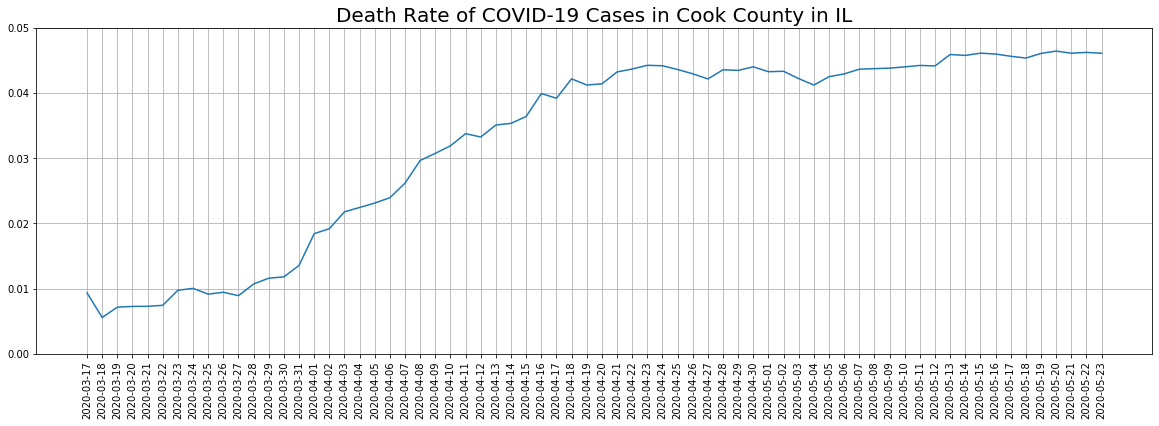

In [115]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Cook County in IL', fontsize = '20')
plt.plot(covid_data_IL_Cook.index, covid_data_IL_Cook.death_rate)

y_ticks = np.linspace(0,0.05,6)
plt.xticks(covid_data_IL_Cook.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [120]:
covid_data_latest[covid_data_latest['state'] == 'Michigan'].sort_values(by='cases', ascending=False).head(10)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
74566,2020-05-23,Wayne County,Michigan,19697,2361,0.119866,Michigan_Wayne County,1749343.0,1125.965577,134.964955,0.957424,0.991555,0.994018,0.036594
73397,2020-05-23,Oakland County,Michigan,8192,954,0.116455,Michigan_Oakland County,1257584.0,651.407779,75.859744,0.901126,0.969388,0.989444,0.088318
72617,2020-05-23,Macomb County,Michigan,6482,778,0.120025,Michigan_Macomb County,873972.0,741.671358,89.018870,0.921886,0.975721,0.978184,0.056298
74358,2020-05-23,Unknown County,Michigan,3422,66,0.019287,Michigan_Unknown County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72139,2020-05-23,Kent County,Michigan,3308,67,0.020254,Michigan_Kent County,656955.0,503.535250,10.198568,0.866291,0.745602,0.965517,0.099226
71205,2020-05-23,Genesee County,Michigan,1936,240,0.123967,Michigan_Genesee County,405813.0,477.067023,59.140540,0.858550,0.952498,0.939831,0.081281
74491,2020-05-23,Washtenaw County,Michigan,1282,96,0.074883,Michigan_Washtenaw County,367601.0,348.747691,26.115272,0.787474,0.875440,0.933146,0.145672
73942,2020-05-23,Saginaw County,Michigan,982,105,0.106925,Michigan_Saginaw County,190539.0,515.380053,55.106829,0.868403,0.949331,0.879310,0.010908
72005,2020-05-23,Kalamazoo County,Michigan,793,47,0.059269,Michigan_Kalamazoo County,265066.0,299.170773,17.731433,0.750176,0.824068,0.910626,0.160450
71695,2020-05-23,Ingham County,Michigan,695,25,0.035971,Michigan_Ingham County,292406.0,237.683221,8.549756,0.698452,0.714989,0.918015,0.219564


In [119]:
covid_data_latest[covid_data_latest['state'] == 'Michigan'].sort_values(by='CasesPer100000', ascending=False).head(10)

,date,county,state,cases,deaths,death_rate,State_County,2019EstPop,CasesPer100000,DeathsPer100000,Pctile_CasesPer100000,Pctile_DeathsPer100000,Pctile_2019EstPop,Diff_Pct2019Pop_VS_PctCases
74566,2020-05-23,Wayne County,Michigan,19697,2361,0.119866,Michigan_Wayne County,1749343.0,1125.965577,134.964955,0.957424,0.991555,0.994018,0.036594
72617,2020-05-23,Macomb County,Michigan,6482,778,0.120025,Michigan_Macomb County,873972.0,741.671358,89.018870,0.921886,0.975721,0.978184,0.056298
73397,2020-05-23,Oakland County,Michigan,8192,954,0.116455,Michigan_Oakland County,1257584.0,651.407779,75.859744,0.901126,0.969388,0.989444,0.088318
73942,2020-05-23,Saginaw County,Michigan,982,105,0.106925,Michigan_Saginaw County,190539.0,515.380053,55.106829,0.868403,0.949331,0.879310,0.010908
72139,2020-05-23,Kent County,Michigan,3308,67,0.020254,Michigan_Kent County,656955.0,503.535250,10.198568,0.866291,0.745602,0.965517,0.099226
71205,2020-05-23,Genesee County,Michigan,1936,240,0.123967,Michigan_Genesee County,405813.0,477.067023,59.140540,0.858550,0.952498,0.939831,0.081281
70903,2020-05-23,Crawford County,Michigan,58,5,0.086207,Michigan_Crawford County,14029.0,413.429325,35.640459,0.828994,0.907460,0.266890,-0.562104
73697,2020-05-23,Otsego County,Michigan,100,10,0.100000,Michigan_Otsego County,24668.0,405.383493,40.538349,0.825827,0.922942,0.447572,-0.378255
70349,2020-05-23,Berrien County,Michigan,584,42,0.071918,Michigan_Berrien County,153401.0,380.701560,27.379222,0.810697,0.878255,0.850809,0.040113
71509,2020-05-23,Hillsdale County,Michigan,168,24,0.142857,Michigan_Hillsdale County,45605.0,368.380660,52.625809,0.800844,0.946165,0.636875,-0.163969


In [117]:
whos

Variable                   Type         Data/Info
-------------------------------------------------
FuncFormatter              type         <class 'matplotlib.ticker.FuncFormatter'>
USA_pop_county             DataFrame            State            <...>\n[3194 rows x 4 columns]
cases_day0                 int64        543
county_list1               list         n=20
county_list2               list         n=20
covid_IL_daily             DataFrame                newcases_dail<...>\n\n[74 rows x 2 columns]
covid_MI_OAK               DataFrame                cases  deaths<...>\n\n[74 rows x 3 columns]
covid_MI_OAK_cum           DataFrame                cases  deaths<...>               0.010593  
covid_MI_OAK_daily         DataFrame                newcases_dail<...>\n\n[74 rows x 2 columns]
covid_MI_OAK_deathrate     DataFrame                cases  deaths<...>\n\n[65 rows x 3 columns]
covid_MI_OAK_pct           DataFrame                cases_dailypc<...>\n\n[65 rows x 2 columns]
covid_MI_Way